<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# Flight Passenger Satisfaction Prediction

---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Feature Engineering.**](#Section53)<br>
  - **5.4** [**Post Processing Report**](#Section54)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Encoding the Categorical Data**](#Section71)<br>
  - **7.2** [**Feature Selection**](#Section72)<br>
  - **7.3** [**Cross Validation/ Train-Test Split**](#Section73)<br>
  - **7.4** [**Data Standardization**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**ModelName - Baseline Model**](#Section81)<br>
  - **8.2** [**Using Trained Model for Prediction**](#Section82)<br>
  - **8.3** [**Model Evaluation**](#Section83)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---


<center><img src="https://github.com/LishaJayesh/Machine-Learning-Projects/blob/main/Flight%20Passenger%20Satisfaction%20Prediction/Images/airplane.jpg?raw=true" /></center>


Airplanes have always been one of the first choices for people to travel because of their convenience and safety. 
Due to fierce competition in the airline industry, the airline company needs to focus on the passenger’s experience and satisfaction. Predicting aircraft passenger satisfaction and excavating the main influencing factors can help airlines improve their services and gain advantages in difficult situations and competition.

Customer feedback, in particular, is critical since it is an outcome measurement for business performance. So, they need to analyze the data of the passenger's travel history. One of the key measurements in this process is whether the passenger feels satisfied or not. Currently, the airline company has a manual process to analyze the customer satisfaction based on the number of feedback and complaint mail that they receive.

---
<a name = Section2></a>
# **2. Problem Statement**
---
<center><img src="https://github.com/LishaJayesh/Machine-Learning-Projects/blob/main/Flight%20Passenger%20Satisfaction%20Prediction/Images/satisfaction%20survery.jpg?raw=true" width="800", height="200"/></center>
The current manual process suffers from the following problems:

- Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task. 
- This process needs to be repeated every time they receive some feedback.

The company has hired a data science consultant to automate the process of predicting the passenger satisfaction based on the travel history data collected by the airline company.

The data science consultant is to analyse and build a classification model using the dataset.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [7]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data
#!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance 

<a name = Section32></a>
### **3.2 Upgrading Libraries**

In [8]:
#!pip install -q --upgrade pandas-profiling
#!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [9]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                  # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.preprocessing import LabelEncoder
#
from sklearn.model_selection import train_test_split                # To split the data in training and testing part  
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
#-------------------------------------------------------------------------------------------------------------------------------
#
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier                     # To instantiate a Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.ensemble import AdaBoostClassifier
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import roc_auc_score                           # For calculating the Precision of the model
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import classification_report                   # To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix of the model
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve                          # To plot Roc-Auc curve
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<ipython-input-9-9869835d29d6>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of passenger boarding and deboarding information and the services provided during the travel in flight.

- The column **satisfaction** is a measure of the overall satisfaction. We have to predict this data for future samples.

  **Dataset Feature Description**<br>
  The Dataset contains the following columns:

| Column Name                     | Description                                               |
| -------------                   |:-------------                                            :| 
| Id                              | Unique Id                                                 | 
| Gender                          | Gender of the Passenger                                   |  
| Customer Type                   | If the customer is loyal or disloyal                      | 
| Age                             | Age of the customer                                       |   
| Type of Travel                  | If the travel is for a business or a personal purpose     |
| Class                           | Class of the aircraft in which the customer is travelling |
| Flight Distance                 | Distance covered by the flight                            |
|Inflight wifi service            |	If there is inflight wifi service or not                  |
|Departure/Arrival time convenient|	Rating by the customer for Departure/Arrival Time
|Ease of Online booking	          | Rating by the customer for this facility
|Gate location	                  | Rating by the customer for this facility
|Food and drink	                  | Rating by the customer for this facility
|Online boarding	              | Rating by the customer for this facility
|Seat comfort	                  | Rating by the customer for this facility
|Inflight entertainment	          | Rating by the customer for this facility
|On-board service	              | Rating by the customer for this facility
|Leg room service	              | Rating by the customer for this facility
|Baggage handling	              | Rating by the customer for this facility
|Checkin service	              | Rating by the customer for this facility
|Inflight service	              | Rating by the customer for this facility
|Cleanliness	                  | Rating by the customer for this facility
|Departure Delay in Minutes	      | Rating by the customer for this facility
|Arrival Delay in Minutes	      | Rating by the customer for this facility
|satisfaction	                  | If the passenger is satisfied or not

In [10]:
#Read the Customer dataset provided for Train and Test
df_cust_train = pd.read_csv("cust_train.csv")
df_cust_test = pd.read_csv("cust_test.csv")

In [11]:
df_cust_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.00000,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.00000,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.00000,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.00000,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.00000,satisfied


In [12]:
df_cust_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.00000
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.00000
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.00000
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.00000
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.00000


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [13]:
print('Data Shape for Tain:', df_cust_train.shape)

Data Shape for Tain: (83123, 24)


In [14]:
df_cust_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

**Observation:**
- The train dataset contains __83123 rows/observations__ and __24 columns/attributes.__
- The last column __satisfaction__ is the __target variable__ we have to predict for future samples.
- There are __null/missing value__ present in __Arrival Delay in Minutes__ column.
- **Each feature** seems to have **correct data type**.
- There are __19 numerical variables present before pre-processing.__
- There are __5 categorical columns.__

In [15]:
print('Data Shape for Test:', df_cust_test.shape)

Data Shape for Test: (20781, 23)


In [16]:
df_cust_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

**Observation:**
- The test dataset contains __20781 rows/observations__ and __23 columns/attributes.__
- There are __null/missing value__ present in __Arrival Delay in Minutes__ column.
- **Each feature** seems to have **correct data type**.
- There are __19 numerical variables present before pre-processing.__
- There are __4 categorical columns.__

<a name = Section42></a>
### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [17]:
df_cust_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,82872.00000
mean,64971.53957,39.35111,1190.68675,2.73255,3.06227,2.75639,2.97806,3.20529,3.25284,3.44279,3.36299,3.38364,3.35141,3.63431,3.30819,3.64387,3.29135,14.71456,15.06312
std,37465.88672,15.09949,998.64002,1.32995,1.52698,1.40105,1.27906,1.33048,1.35090,1.31832,1.33188,1.28778,1.31336,1.17893,1.26475,1.17335,1.31356,38.10887,38.47549
min,1.00000,7.00000,31.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,32552.50000,27.00000,413.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,3.00000,3.00000,3.00000,2.00000,0.00000,0.00000
50%,64864.00000,40.00000,844.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,4.00000,4.00000,4.00000,4.00000,3.00000,4.00000,3.00000,0.00000,0.00000
75%,97430.50000,51.00000,1744.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,5.00000,4.00000,4.00000,4.00000,5.00000,4.00000,5.00000,4.00000,12.00000,13.00000
max,129880.00000,85.00000,4983.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,1592.00000,1584.00000


In [18]:
df_cust_train.describe(include = [object])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,83123,83123,83123,83123,83123
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,42117,67915,57310,39691,47004


**Observations:**
- __Gender__ has 2 distinct values ie., __Male and Female__ and male to female ratio is nearly __50:50.__
- __Customer Type__ has 2 disctinct values ie., __Loyal Customer and disloyal Customer__ and the number of __Loyal customers are more__ than disloyal customers. The ratio of Loyal to Disloyal customer is nearly __80:20.__
- __Type of travel__ has 2 distinct values ie., __Business Travel and Personal Travel__ and the number of Business travellers are more than Personal travellers. The ratio of Business to Personal travellers is nearly __70:30.__
- The __Class of aircraft__ has 3 distinct values ie., __Business, Eco and Eco plus__ and __Business class has the highest frequency.__
- __Age is somewhat normally distributed.__ The __average Age__ of the customers traveling is about __40 years.__ Age range between 7 to 85 years. 
- __Flight distance__ is highly positively skewed. 
- For __Baggeage Handling, Inflight Service and Checkin Service 50% of the ratigs are between 3 and 5.__ For other services 50% of the ratigs are between 2 and 4.
- __50% of the time there is no delay in departure or arrival of the flights__ and 25% time there seems to be less than 12 mins delay.
- Looking at the 75% to max range for delay in departure and arrival we can see that there are some outliers.
- Dependent variable __satisfaction__ has 2 distinct values ie., __neutral or dissatisfied and satisfied__ and the number of __neutral or dissatisfied customer are more__ than satisfied customers. Ratio being 56:43.  


In [19]:
df_cust_test.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,20781.00000,20781,20781,20781.00000,20781,20781,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20781.00000,20722.00000
unique,nan,2,2,nan,2,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,Female,Loyal Customer,nan,Business travel,Business,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,10610,17008,nan,14345,9974,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,64734.89649,NaN,NaN,39.49411,NaN,NaN,1184.49492,2.71820,3.05240,2.75896,2.97219,3.18950,3.24051,3.42582,3.33882,3.37727,3.34965,3.62191,3.28868,3.62668,3.26635,15.21986,15.64082
std,37455.81661,NaN,NaN,15.17654,NaN,NaN,991.16238,1.31928,1.51743,1.39046,1.27185,1.32569,1.34390,1.32211,1.33728,1.29068,1.32456,1.18874,1.26790,1.18480,1.30695,38.71344,39.57628
min,3.00000,NaN,NaN,7.00000,NaN,NaN,31.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,32489.00000,NaN,NaN,27.00000,NaN,NaN,421.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,3.00000,2.00000,3.00000,2.00000,0.00000,0.00000
50%,64792.00000,NaN,NaN,40.00000,NaN,NaN,835.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,4.00000,4.00000,4.00000,4.00000,3.00000,4.00000,3.00000,0.00000,0.00000
75%,97095.00000,NaN,NaN,51.00000,NaN,NaN,1739.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,5.00000,4.00000,4.00000,4.00000,5.00000,4.00000,5.00000,4.00000,13.00000,13.00000


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [20]:
profile = ProfileReport(df = df_cust_train)
profile.to_file(output_file = 'ML2 Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


__Observations from Pandas Profiling before Data Processing__<br><br>
__Dataset info__:
- Number of variables: 24
- Number of observations: 83123
- Missing cells: 251 (<0.1%)
- No duplicate rows

__Variables types__: 
- Numeric = 19
- Categorical = 5

<br>   

   - userid is unique (hihgly cardinal) as expected. There are no missing values.
   - Age is normally distributed.
   - Categorical variables are as observed and mentioned above.
   - Flight distance is highly positively skewed.
   - Ratings have values from 0 to 5(max).
   - Inflight __Wi-fi Service__ has __3.0% zero__ rating and maximum ratings of __3 (24.9%) and 2 (24.8%)__
   - __Departure and Arrival Time convenient__ has __5.1% zero__ rating and maximum ratings of __4 (24.5%) and 5 (21.7%)__
   - __Ease of online booking__ has __4.3% zero__ rating and maximum ratings of __3 (23.5%) and 2 (23.0%)__
   - __online boarding__ has __2.4% zero__ rating and maximum ratings of __4 (29.6%) and 3 (21.0%)__
   - __Gate location__ has __< 0.1% zero__ rating and maximum ratings of __3 (27.5%) and 4 (23.5%)__
   - __Food and Drink__  has __0.1% zero__ rating but __equally distributed between ratings 2 to 5.__
   - Other categories have __<0.1% zero__ rating and __maximum rating of 4.__
   - Departure Delay in Minutes is highly correlated with Arrival Delay in Minutes and vice-versa.
   - For full details check out the report.

<a name = Section52></a>
### **5.2 Data Manipulation**

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data - null data or zero data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

<a name = Section521></a>
#### **5.2.1 Handling Missing Data**

__Identifying the missing data__

In [21]:
#Identifying if any missing data is present in train dataset
df_cust_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             251
satisfaction                           0
dtype: int64

In [22]:
#Identifying if any missing data is present in test dataset
df_cust_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             59
dtype: int64

__Dealing with missing data__
    - "Arrival Delay in Minutes" seems to have outliers, so it will be a bad idea to replace the Null values with the mean.
    - We will impute the missing entries in "Arrival Delay in Minutes" with the median value.

In [23]:
#Imputing the null data in "Arrival Delay in Minutes" column from train and test data set with the mean
df_cust_train['Arrival Delay in Minutes'].fillna(df_cust_train['Arrival Delay in Minutes'].median(),inplace = True)
df_cust_test['Arrival Delay in Minutes'].fillna(df_cust_test['Arrival Delay in Minutes'].median(),inplace = True)

In [24]:
#re-checking if any null value is present in "Arrival Delay in Minutes" column in train dataset
df_cust_train['Arrival Delay in Minutes'].isnull().sum()

0

In [25]:
#re-checking if any null value is present in "Arrival Delay in Minutes" column in test dataset
df_cust_test['Arrival Delay in Minutes'].isnull().sum()

0

In [26]:
df_cust_train.shape 

(83123, 24)

In [27]:
df_cust_test.shape 

(20781, 23)

<a name = Section522></a>
#### **5.2.2 Handling Redundant Data**

- ID column is highly cardinal so we can drop it

In [28]:
# drop id column from Train dataset
df_cust_train.drop('id', axis=1, inplace = True)

In [29]:
#re-checking the shape of the train and test data set, one column must be dropped from each dataset
print("Shape of train dataset:", df_cust_train.shape)
print("Shape of test dataset:", df_cust_test.shape)

Shape of train dataset: (83123, 23)
Shape of test dataset: (20781, 23)


<a name = Section523></a>
#### **5.2.3 checking for duplicates**

In [30]:
df_cust_train.duplicated().sum()

0

In [31]:
df_cust_test.duplicated().sum()

0

- There are no duplicate values in the train and test datasets.

<a name = Section53></a>
### **5.3 Feature Engineering.**

- **Grouping the age into buckets and creating a new categorical column 'age_group' for further analysis.**

In [32]:
# Grouping the age into buckets of 15 for train and test datasets
labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']
df_cust_train['Age_group'] = pd.cut(df_cust_train['Age'], bins=np.arange(0,91,15), labels=labels)

In [33]:
df_cust_test['Age_group'] = pd.cut(df_cust_test['Age'], bins=np.arange(0,91,15), labels=labels)

In [34]:
df_cust_train[['Age','Age_group']].sample(5)

,Age,Age_group
45303,57,45-60
4908,54,45-60
4299,39,30-45
5760,20,15-30
18347,46,45-60


In [35]:
df_cust_test[['Age','Age_group']].sample(5)

,Age,Age_group
8469,29,15-30
7235,53,45-60
20535,33,30-45
18404,25,15-30
3970,23,15-30


- **Creating a new variable 'Total delay'**

In [36]:
df_cust_train['Total Delay'] = (df_cust_train['Departure Delay in Minutes'] + df_cust_train['Arrival Delay in Minutes'])

In [37]:
df_cust_train['Total Delay'].sample(5)

14279   40.00000
31447    0.00000
50866    0.00000
32148   16.00000
14935    0.00000
Name: Total Delay, dtype: float64

In [38]:
df_cust_test['Total Delay'] = df_cust_test['Departure Delay in Minutes'] + df_cust_test['Arrival Delay in Minutes']

In [39]:
df_cust_test['Total Delay'].sample(5)

530       0.00000
16231     0.00000
2827      0.00000
7372      0.00000
4598    514.00000
Name: Total Delay, dtype: float64

- **Mapping the target variable 'satisfaction' to integer value for further analysis**

In [40]:
df_cust_train['satisfaction'] = df_cust_train['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})

In [41]:
df_cust_train['satisfaction'].sample(5)

31525    0
34239    1
10059    1
17738    0
32407    1
Name: satisfaction, dtype: int64

- getting the data information after pre-processing


In [42]:
df_cust_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             83123 non-null  object  
 1   Customer Type                      83123 non-null  object  
 2   Age                                83123 non-null  int64   
 3   Type of Travel                     83123 non-null  object  
 4   Class                              83123 non-null  object  
 5   Flight Distance                    83123 non-null  int64   
 6   Inflight wifi service              83123 non-null  int64   
 7   Departure/Arrival time convenient  83123 non-null  int64   
 8   Ease of Online booking             83123 non-null  int64   
 9   Gate location                      83123 non-null  int64   
 10  Food and drink                     83123 non-null  int64   
 11  Online boarding                    83123 

In [43]:
#getting the sample of the data set
df_cust_train.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,Total Delay
78786,Female,Loyal Customer,13,Personal Travel,Eco,238,1,5,1,3,2,1,2,2,5,3,4,4,4,2,0,0.00000,0,0-15,0.00000
32101,Male,disloyal Customer,22,Business travel,Eco,845,5,5,5,1,5,5,5,5,4,3,4,1,3,5,15,9.00000,1,15-30,24.00000
65935,Female,Loyal Customer,53,Business travel,Eco Plus,332,2,3,3,3,1,4,3,1,1,2,1,2,1,1,85,92.00000,0,45-60,177.00000
72595,Male,Loyal Customer,33,Business travel,Business,2334,4,4,4,4,5,4,5,5,5,4,4,3,4,5,11,9.00000,1,30-45,20.00000
12146,Male,Loyal Customer,33,Business travel,Business,3710,4,4,4,4,4,4,4,4,2,2,3,4,4,4,7,0.00000,0,30-45,7.00000


In [44]:
df_cust_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 20781 non-null  int64   
 1   Gender                             20781 non-null  object  
 2   Customer Type                      20781 non-null  object  
 3   Age                                20781 non-null  int64   
 4   Type of Travel                     20781 non-null  object  
 5   Class                              20781 non-null  object  
 6   Flight Distance                    20781 non-null  int64   
 7   Inflight wifi service              20781 non-null  int64   
 8   Departure/Arrival time convenient  20781 non-null  int64   
 9   Ease of Online booking             20781 non-null  int64   
 10  Gate location                      20781 non-null  int64   
 11  Food and drink                     20781 

In [45]:
#getting the sample of the data set
df_cust_test.sample(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_group,Total Delay
11800,74934,Female,Loyal Customer,53,Business travel,Eco,2586,2,1,3,1,5,3,4,2,2,2,2,4,2,2,0,0.00000,45-60,0.00000
16563,99959,Female,Loyal Customer,43,Personal Travel,Eco Plus,2237,2,4,2,3,5,4,5,1,1,2,5,5,1,5,0,0.00000,30-45,0.00000
16974,110807,Female,Loyal Customer,20,Personal Travel,Eco,990,3,4,3,4,2,3,2,2,3,3,5,3,4,2,9,4.00000,15-30,13.00000
11853,56530,Female,Loyal Customer,52,Business travel,Business,1065,5,5,5,5,2,4,5,4,4,5,4,4,4,5,0,0.00000,45-60,0.00000
12348,13750,Female,Loyal Customer,26,Personal Travel,Eco,384,2,4,4,3,4,2,2,3,5,5,4,2,4,2,209,200.00000,15-30,409.00000


<a name = Section54></a>
### **5.4 Post Processing Report**

- After doing **missing value Imputation**, **feature engineering**, **Removing unwanted features** we will now look at the report again.

In [46]:
profile = df_cust_train.profile_report(title="ML2 FLight Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="ML2 FLight_profiling_after_preprocessing.html")

**Observation:**

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

### Univariate Analysis of categorical column

In [47]:
# get the list of categorical columns
category_cols = df_cust_train.select_dtypes(include=['object', 'category']).columns
display(category_cols)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age_group'], dtype='object')

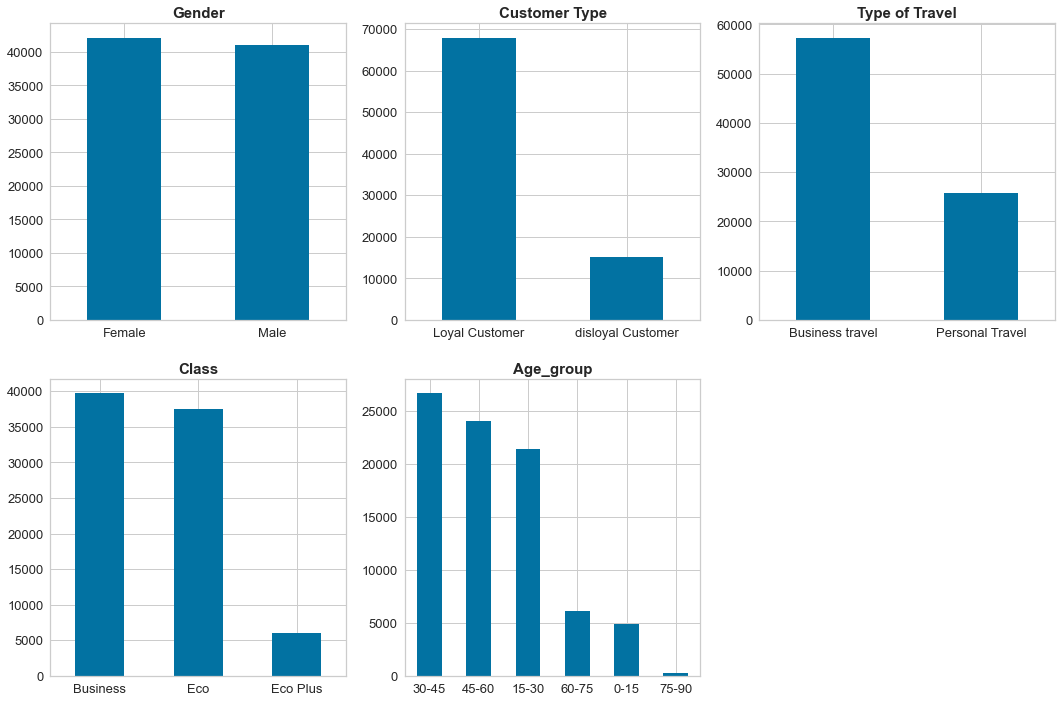

In [48]:
# plotting Bar chart to check for the categorical columns
k=0
plt.figure(figsize=(18,12))
for col in category_cols:    
    k=k+1
    plt.subplot(2, 3, k)    
    df_cust_train[col].value_counts().plot(kind='bar')
    plt.title(col, size=15, weight='bold')
    plt.xticks(rotation=0, size=13)
    plt.yticks(rotation=0, size=13)

**Observations**
1. Gender -  has 2 distinct values: __Male and Female__ and male to female ratio is nearly __50:50.__
2. Customer Type -  has 2 disctinct values: __Loyal Customer and disloyal Customer__ and the number of __Loyal customers are more__ than disloyal customers. 
3. Type of travel - has 2 distinct values: __Business Travel and Personal Travel__ and the number of Business travellers are more than Personal travellers. 
4. Class of aircraft - has 3 distinct values: __Business, Eco and Eco plus__. Number of Eco plus customers are very less.
5. Maximum customers are in the age group 30-45 followed by 45-60.

### Frequency and proportion of dependant Variable _'satisfaction'_


In [49]:
df_cust_train['satisfaction'].value_counts()

0    47004
1    36119
Name: satisfaction, dtype: int64

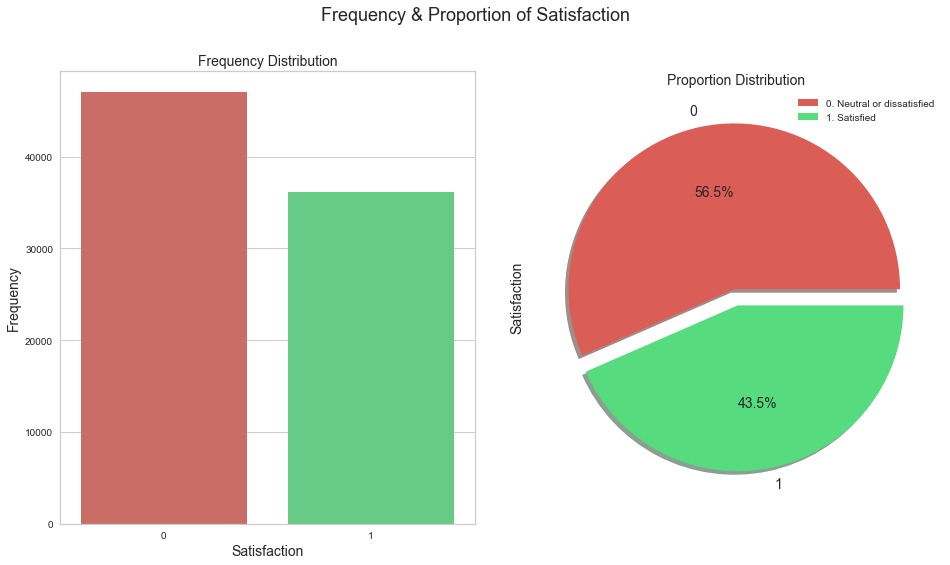

In [50]:
fig = plt.figure(figsize = [12, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'satisfaction', data = df_cust_train, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Satisfaction', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/20
df_cust_train['satisfaction'].value_counts().plot(kind = 'pie', explode = space, fontsize=14, autopct='%1.1f%%', shadow=True, figsize=(14,8), legend=True, colors = ['#DB5E56','#56DB7F'])
plt.legend(['0. Neutral or dissatisfied', '1. Satisfied'])
plt.ylabel(ylabel = 'Satisfaction', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Satisfaction', y = 1.02, size = 18)
plt.show()

**observation**
    - The number of neutral or dissatisfied customers are more than the satisfied customers.

### Univariate Analysis of numerical columns

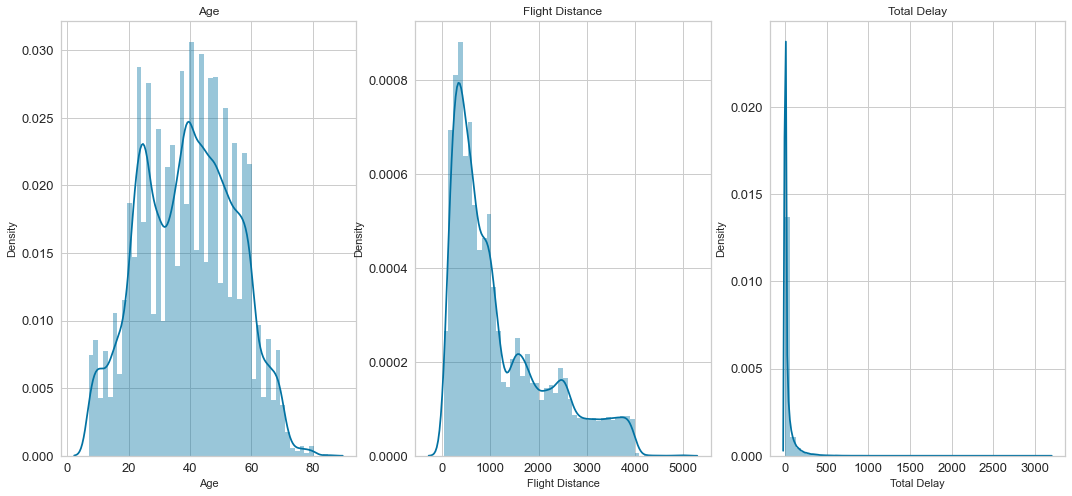

In [51]:
# plotting KDE density plot for the numerical columns: Age, Flight Distance and Total Delay
numeric_cols = ['Age', 'Flight Distance', 'Total Delay']
k=0
plt.figure(figsize=(18,8))
for col in numeric_cols:    
    k=k+1
    plt.subplot(1, 3, k)    
    sns.distplot(df_cust_train[col])
    plt.title(col)
    plt.xticks(rotation=0, size=13)
    plt.yticks(rotation=0, size=13)

**Observation**
1. Age is somewhat normally distributed. The average Age of the customers traveling is about 40 years. Maximum customers are between 20 to 60 yeras of age.
2. Looking at the Flight Distance KDE plot we can say that there are more short distance flights compared to long distant flights.
3. There seems to be very less delay in departure/arrival of flights less than 12 mins.

### Relation between dependent variable 'Satisfaction' and other independant variables

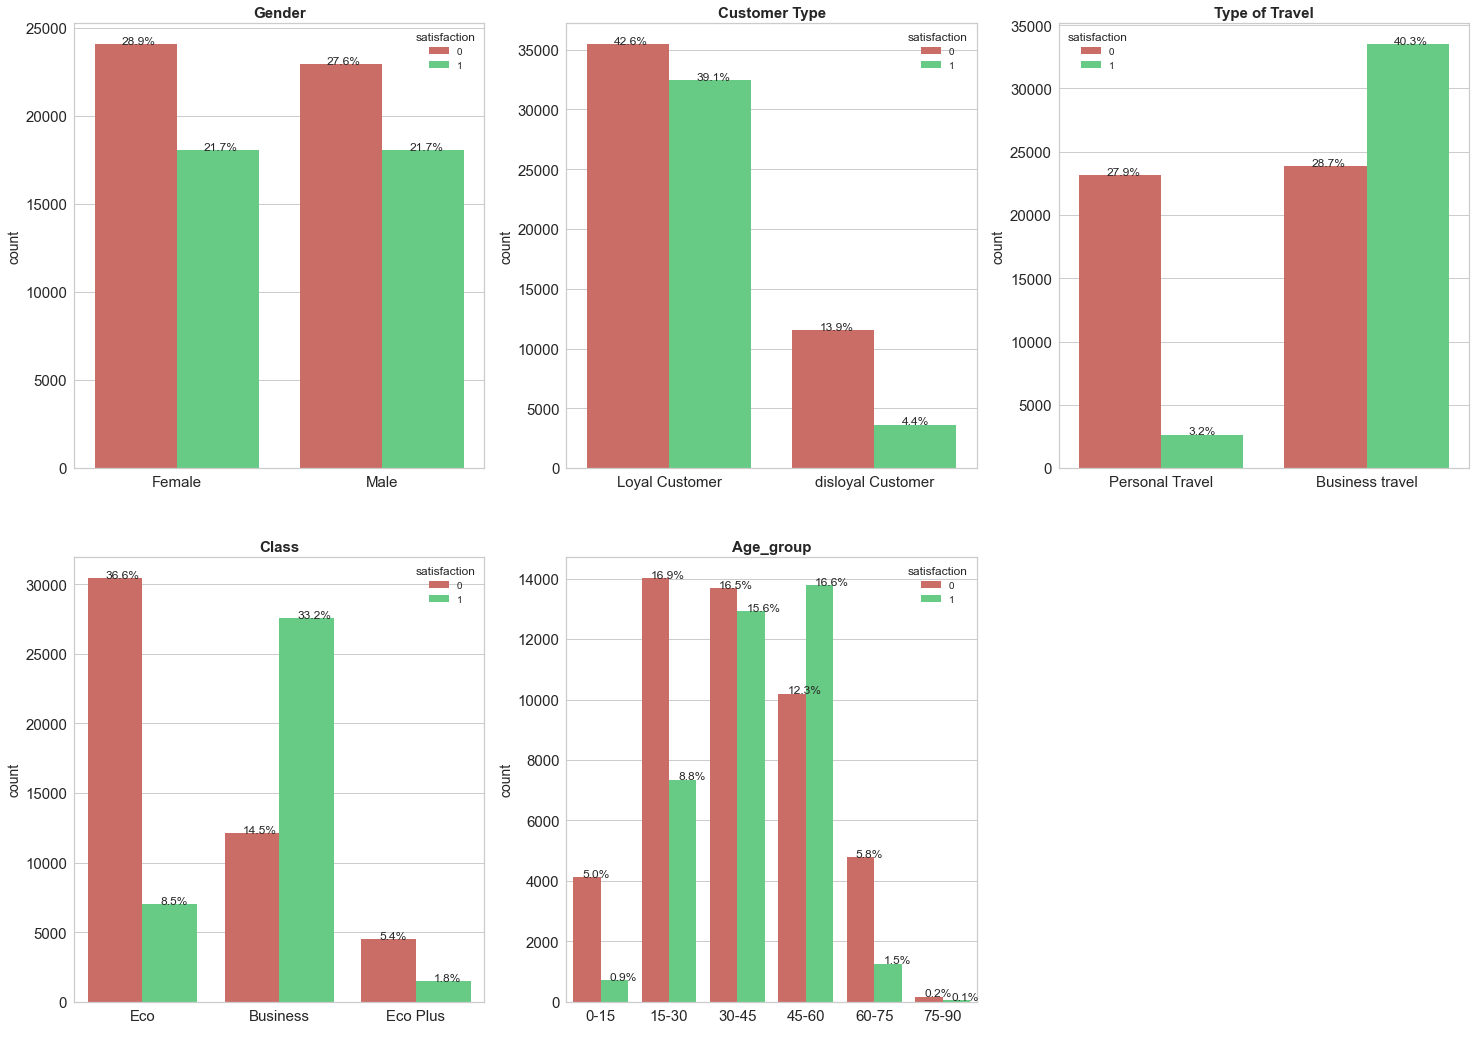

In [52]:
# plotting countplot to check for the categorical columns
k=0
plt.figure(figsize=(25,18))
for col in category_cols:    
    k=k+1
    plt.subplot(2, 3, k)    
    ax = sns.countplot(x = col, hue = 'satisfaction', data = df_cust_train, palette = ['#DB5E56','#56DB7F'])
    for rect in ax.patches:
        a = ((rect.get_height()*100)/len(df_cust_train)).round(1)
        ax.text(rect.get_x() + rect.get_width()/3., rect.get_height(), str(a)+'%', fontsize=12)
        ax.set_xlabel(" ")
        ax.set_ylabel("count", size=14)
    plt.title(col, size=15, weight='bold')
    plt.xticks(rotation=0, size=15)
    plt.yticks(rotation=0, size=15)
  


**Observations:**
1. __Gender__ - __both__ Male and Female are more __dissatisfied (around 28% each)__ with the services. The distribution of satisfaction is __approximately identical for both indicating that it is poorly correlated with the target.__
2. __Customer Type__ - __both__ Loyal and disloyal customers are more __dissatisfied__ with the services.
3. __Type of Travel__ - __Business Travel__ class customers are more __satisfied__ than the Personal Travel class. Nearly __90% of the total Personal Travel customers are dissatisfied.__ 
4. __Class__ - __Business class__ customers are more __satisfied__ than the __Eco class__. Nearly __80% of the total Eco class customers are dissatisfied.__

**<h4>Question: Is there any association between Age and satisfaction?</h4>**

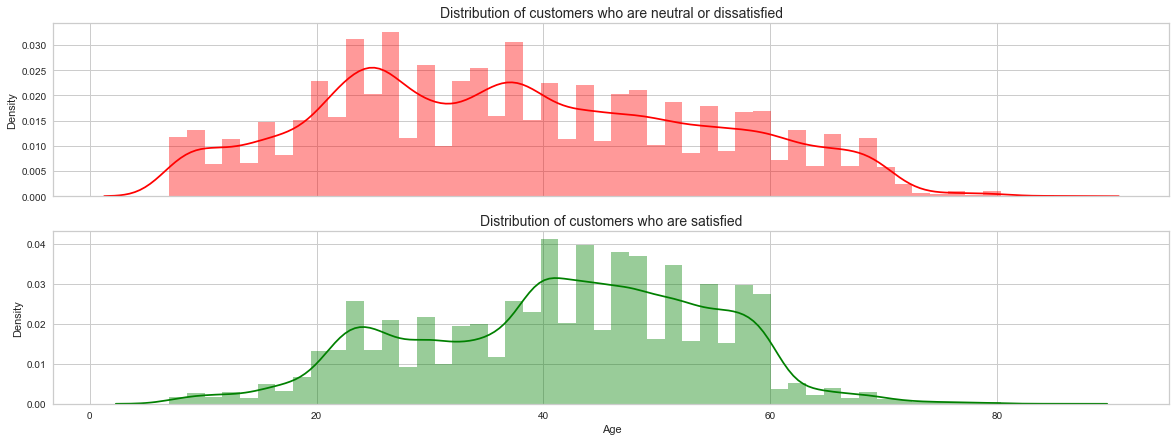

In [53]:
# Slicing data with neutral or dissatisfied customers
Neu_dissatisfied = df_cust_train['Age'][df_cust_train['satisfaction'] == 0]

# Slicing data with satisfied customers
Satisfied = df_cust_train['Age'][df_cust_train['satisfaction'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Neu_dissatisfied, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of customers who are neutral or dissatisfied', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Satisfied, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of customers who are satisfied', size = 14)
plt.show()

**Observation**
- Customers in the age group of 40-60 years, which exhibits the maximum customers are comparatively satisfied.
- But customers of age less than 18 and more than 65 are the least satisfied. 

**<h4>Question: Is there any association between Flight distance and satisfaction?</h4>**

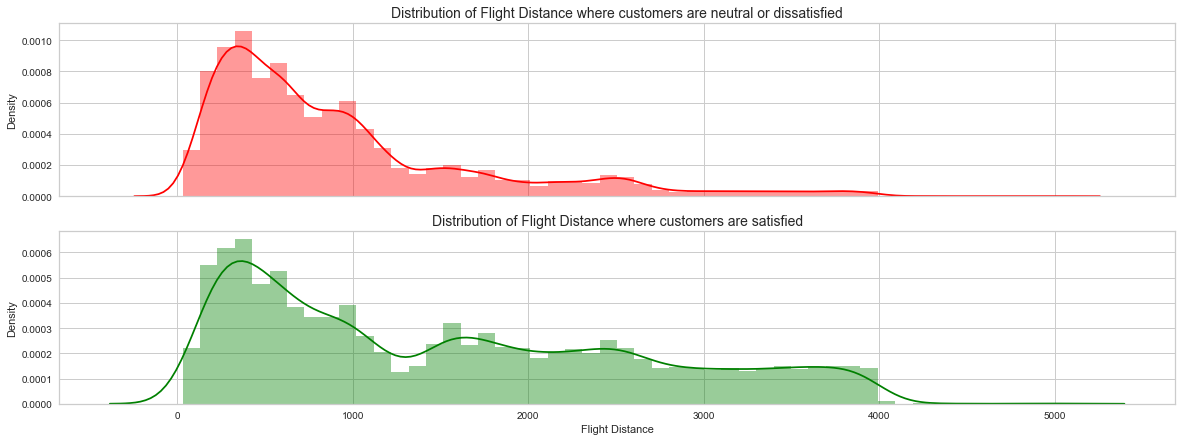

In [54]:
# Slicing data with newutral or dissatisfied customers
Neu_dissatisfied = df_cust_train['Flight Distance'][df_cust_train['satisfaction'] == 0]

# Slicing data with satisfied customers
Satisfied = df_cust_train['Flight Distance'][df_cust_train['satisfaction'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Neu_dissatisfied, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of Flight Distance where customers are neutral or dissatisfied', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Satisfied, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of Flight Distance where customers are satisfied', size = 14)
plt.show()

**Observation**
- Customers are neutral or dissatisfied for short distance travel(less than 1000)
- Customers are comparatively satisfied for long distance > 1500 - 4000.

### Relation between dependent variable 'Satisfaction' and the different rating variables

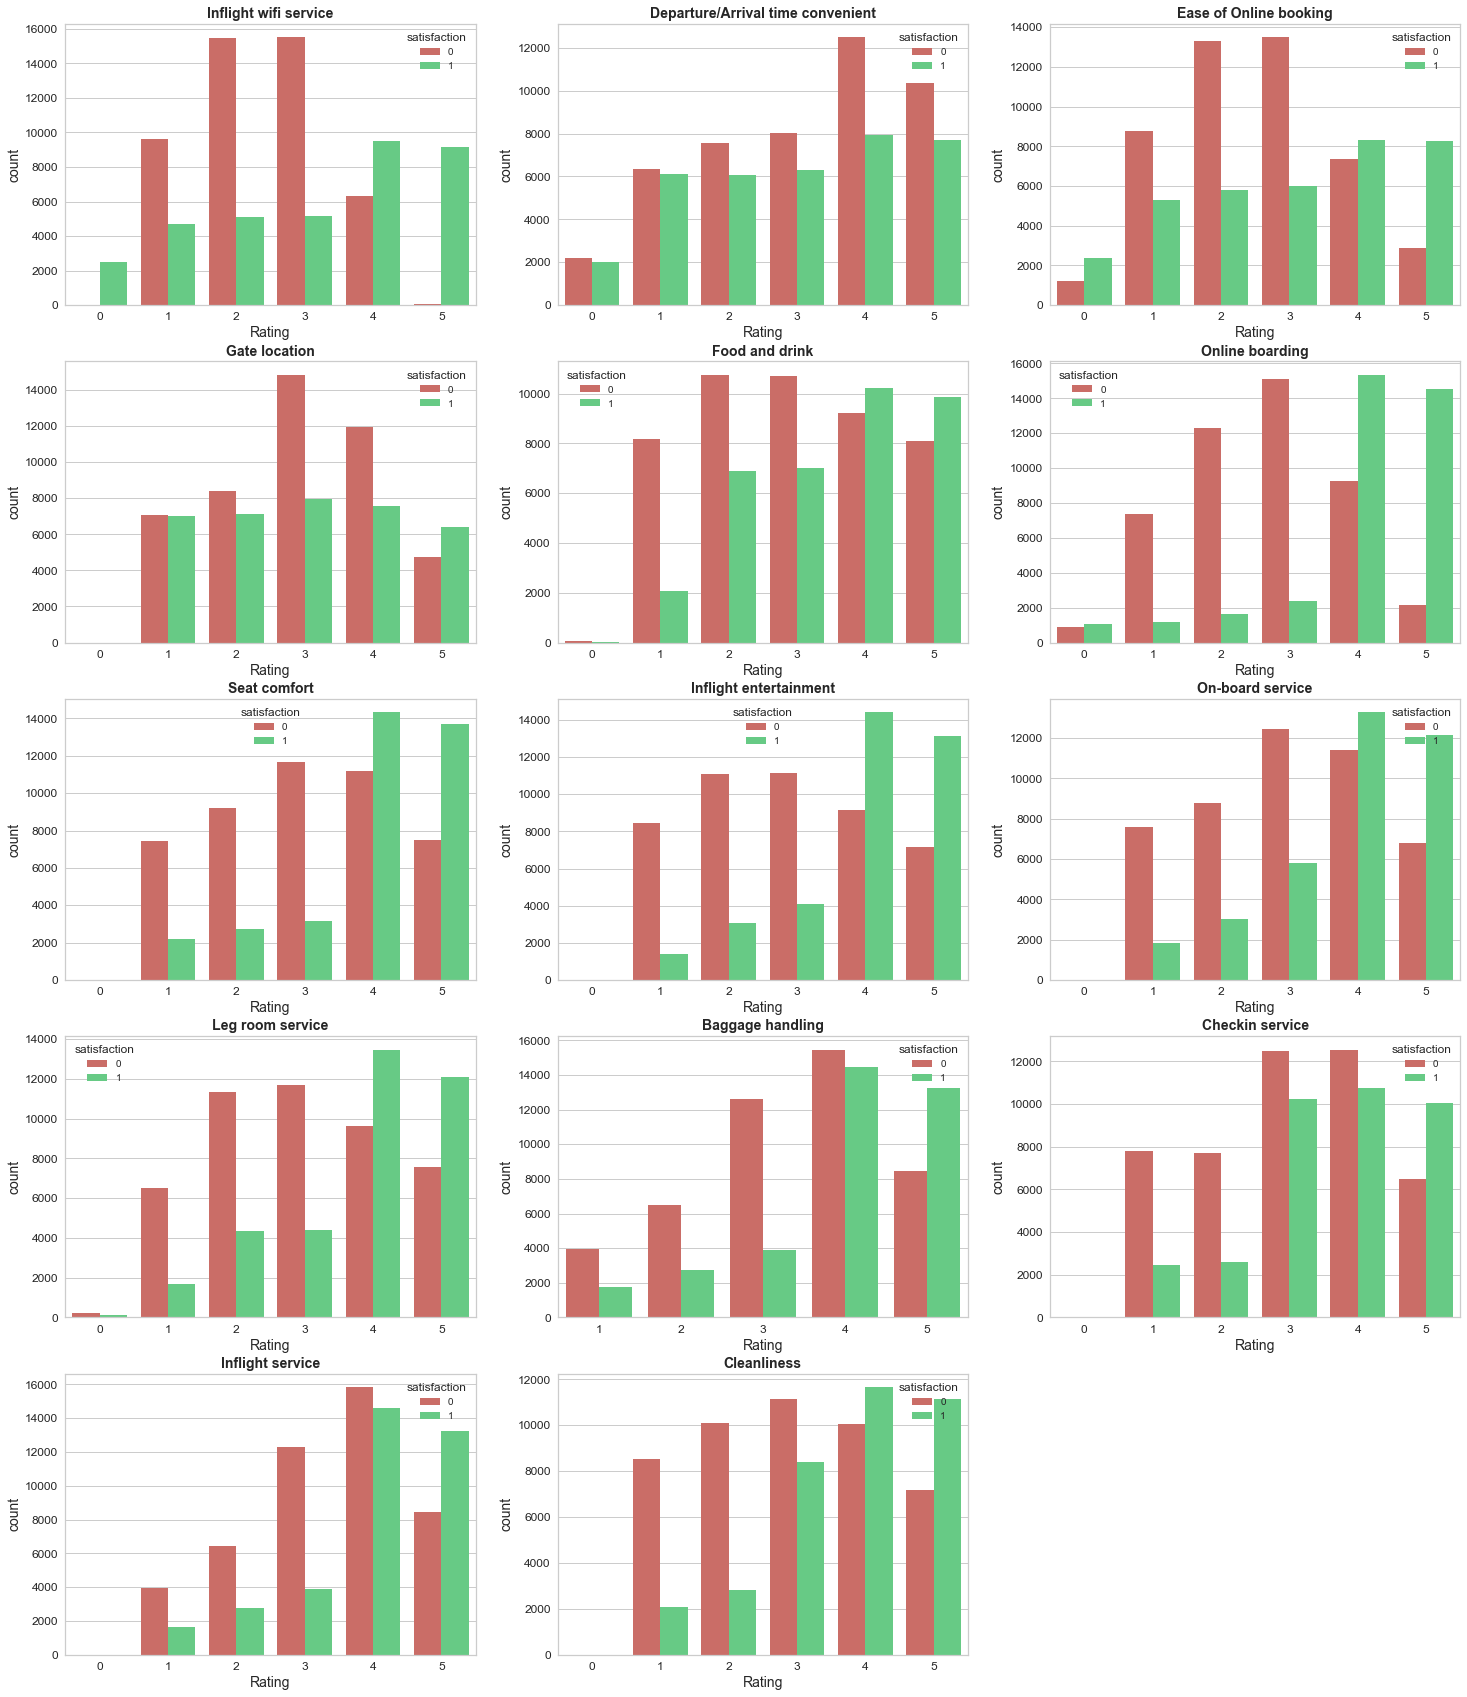

In [55]:
# plotting countplot to check for rating columns
rating_cols = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
               'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
               'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
k=0
plt.figure(figsize=(25,30))
for col in rating_cols:    
    k=k+1
    plt.subplot(5, 3, k)    
    ax = sns.countplot(x = col, hue = 'satisfaction', data = df_cust_train, palette = ['#DB5E56','#56DB7F'])
    plt.title(col, weight="bold", size=14)
    plt.xlabel("Rating",size=14)
    plt.ylabel("count", size=14)
    plt.xticks(size=12)
    plt.yticks(size=12)

**Observations**
1. __Inflight wifi service__ - Most travellers are __dissatisfied__ with the Inflight wifi service.
2. __Departure/Arrival time convenient__ - Most travellers are __satisfied__ with the Departure/Arrival time convenience.
3. __Ease of Online booking__ - Most travellers are __dissatisfied__ with the online booking service
4. __Gate location__ - Even the dissatisfied customers are __happy with the gate location.__
5. __Food and drink__ - Most travellers are __satisfied__ with the Food and Drink supplied in the flight
6. __Online boarding__ - dissatisfied/neutral customers are __not happy with the online boarding__.
7. __Seat comfort__ - dissatisfied/neutral customers are __not happy with the Seat comfort__
8. __Inflight entertainment__ - dissatisfied/neutral customers are __not happy with the Inflight entertainment__
9. __On-board service__ - Most travellers are __satisfied__  with the 
10. __Leg room service__ - dissatisfied/neutral customers are __not happy with the leg room service__
11. __Baggage handling__ - Most travellers are __satisfied__  with the Baggage handling
12. __Checkin service__ - Most travellers are __satisfied__  with the check-in service
13. __Inflight service__ - Most travellers are __satisfied__  with the inflight service
14. __Cleanliness__ - dissatisfied/neutral customers are __not happy with the cleanliness__

**Establishing coorelatio between all the features using _heatmap_.**

Text(0.5, 1.0, 'Correlation between features')

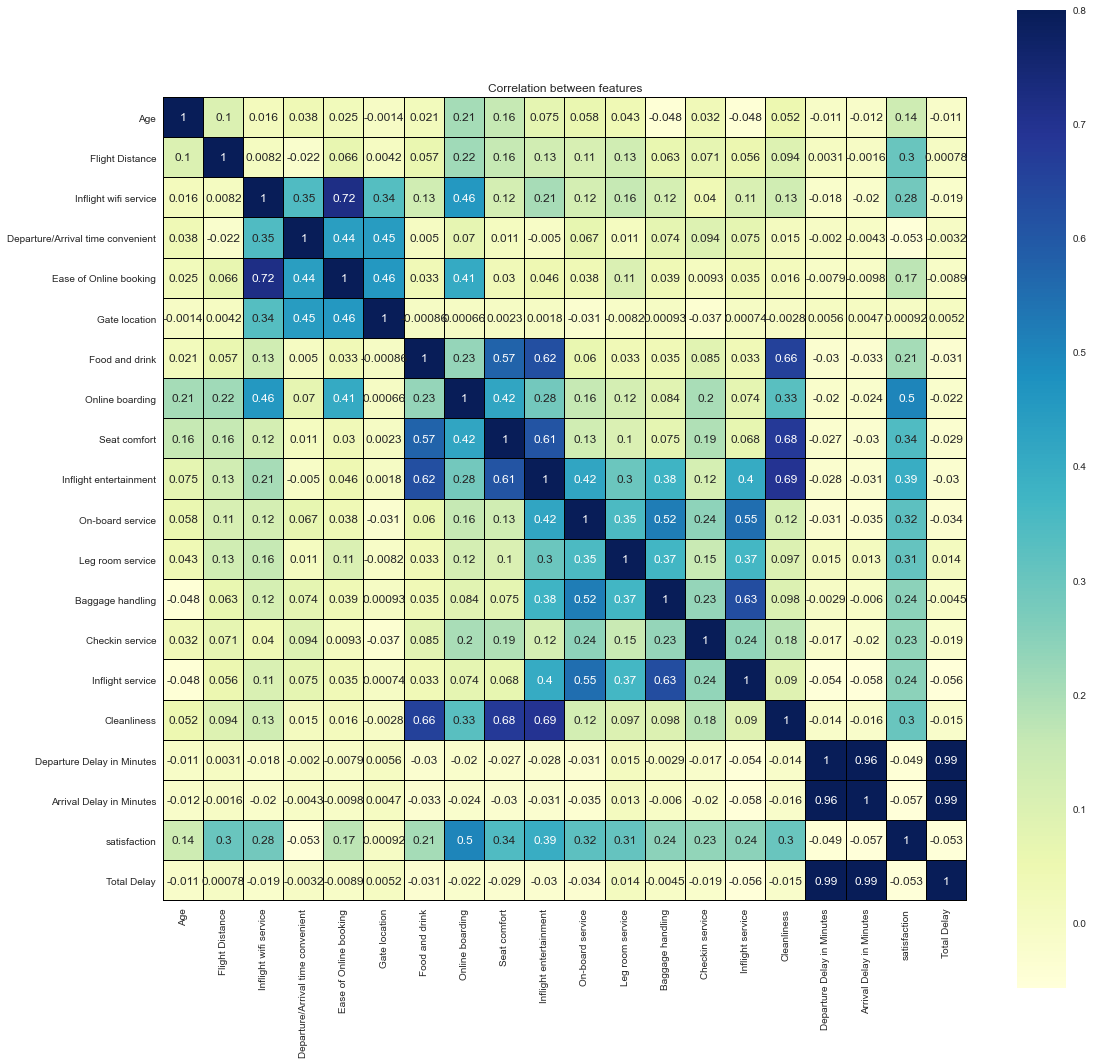

In [56]:
corr = df_cust_train.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:**
- Departur/Arival time convenient (-0.053), Gate location (0.00092), Departure/Arrival Delay (-0.049 & -0.057) have very low correlation  with satisfaction and can be removed.
- Since Total Delay is derived from Departure/Arrival Delay, they are highly correlated.
- Departure Delay & Arrival Delay are highly correlated.

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

<a name = Section71></a>
### **7.1 Data Preparation**


- we will **split** our **data** into **dependent** and **independent** variables for further development.
- Remove any unwanted features from the EDA above

In [57]:
# defining the X and Y variables
X = df_cust_train.drop('satisfaction', axis=1)
y = df_cust_train['satisfaction']

In [58]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_group,Total Delay
0,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.00000,15-30,0.00000
1,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.00000,45-60,76.00000
2,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.00000,15-30,0.00000
3,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.00000,45-60,12.00000
4,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.00000,0-15,0.00000


In [59]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: satisfaction, dtype: int64

**Removing uncorrelated features identified from EDA**
- Departure/Arrival time convenient, Gate location, Departure/Arrival Delay in Minutes, Total Delay have very low correlation with satisfaction and can be removed.
- On the feature ‘Gender’, the distribution of satisfaction is approximately identical for both Male and Female indicating that it is poorly correlated with the target variable, and thus can be removed.
- We will keep the continous varibale Age for Model building and remove the category column age_group.

In [60]:
X = X.drop(['Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay', 'Gender','Age_group'], axis=1)
X.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Loyal Customer,30,Personal Travel,Eco,193,3,0,5,0,5,5,4,5,3,4,4,5
1,Loyal Customer,51,Business travel,Eco,925,2,1,5,3,2,2,2,2,2,3,2,3
2,disloyal Customer,27,Business travel,Eco,505,0,0,1,0,1,1,5,5,2,3,2,1
3,Loyal Customer,52,Business travel,Business,2953,2,2,3,4,5,5,5,5,5,4,5,5
4,disloyal Customer,15,Business travel,Eco,1352,4,4,2,4,2,2,4,3,5,3,5,2


<a name = Section72></a>
### **7.2 Encoding Categorical Features**


In [61]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,30,193,3,0,5,0,5,5,4,5,3,4,4,5,0,1,1,0
1,51,925,2,1,5,3,2,2,2,2,2,3,2,3,0,0,1,0
2,27,505,0,0,1,0,1,1,5,5,2,3,2,1,1,0,1,0
3,52,2953,2,2,3,4,5,5,5,5,5,4,5,5,0,0,0,0
4,15,1352,4,4,2,4,2,2,4,3,5,3,5,2,1,0,1,0


In [62]:
len(X_encoded.columns.tolist())

18

<a name = Section73></a>
### **7.3 Cross Validation/ Train-Test Split**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=1, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (66498, 18) (66498,)
Testing Data Shape: (16625, 18) (16625,)


<a name = Section73></a>
### **7.3  Feature Selection**

- We can objectively estimate the **importance** of features using **Bagged Decision Trees** like **Random Forest** .
- This can be helpful as a **precursor** to **selecting features**.
- Features are allocated **scores** and can then be **ranked** by their scores.
- Those features with the **highest scores** can be **selected** for inclusion in the training dataset, whereas those **remaining** can be **ignored**.

In [64]:
#Extracting important feature using RandomForestClassifier 
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X_train, y_train)

# Extracting list of important features
selected_features = X_train.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_features))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_features)

Total Features Selected are 5
Threshold set by Model: 0.06
Important Features: ['Inflight wifi service', 'Online boarding', 'Inflight entertainment', 'Type of Travel_Personal Travel', 'Class_Eco']


**Visualzation of Important Features:**
- Below features are plotted against their relative importance (in %age),  of each feature.

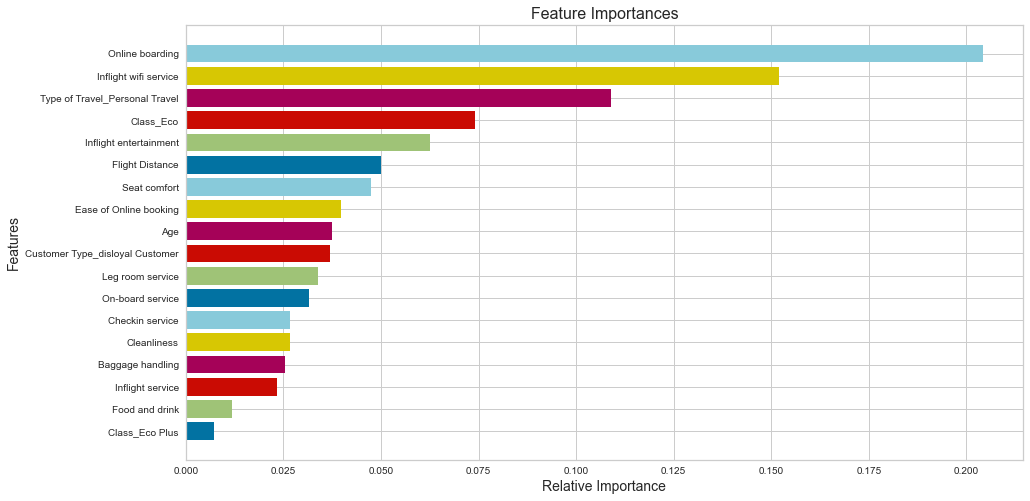

In [65]:
figure = plt.figure(figsize = [15, 8])

viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X_train, y_train)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [66]:
model1 = RandomForestClassifier().fit(X_train,y_train)
model1.feature_importances_

array([0.03823907, 0.04473917, 0.15644772, 0.04033228, 0.01244066,
       0.18551542, 0.05000382, 0.06382101, 0.02931397, 0.0395865 ,
       0.02753956, 0.0267275 , 0.02749982, 0.024906  , 0.03864867,
       0.1196639 , 0.06873541, 0.00583951])

In [67]:
important_features = pd.DataFrame((model1.feature_importances_ * 100),index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
important_features

,importance
Online boarding,18.55154
Inflight wifi service,15.64477
Type of Travel_Personal Travel,11.96639
Class_Eco,6.87354
Inflight entertainment,6.38210
Seat comfort,5.00038
Flight Distance,4.47392
Ease of Online booking,4.03323
Leg room service,3.95865
Customer Type_disloyal Customer,3.86487


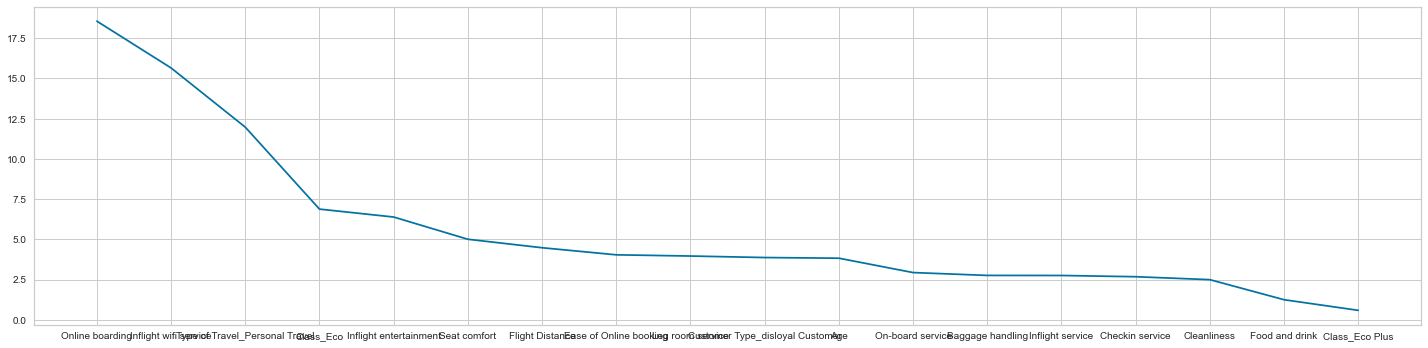

In [68]:
plt.figure(figsize=(20,5))
plt.plot(important_features)
plt.tight_layout()

## Top 10 Feature slection using Chi2 Statistical test

In [69]:
from sklearn.feature_selection import SelectKBest, chi2
select_T10 = SelectKBest(chi2, k=10)
select_T10.fit(X_train, y_train)
selected_T10_features = X_train.columns[(select_T10.get_support())].tolist()
print('Total Features Selected are', len(selected_T10_features))
print('Important Features:', selected_T10_features)

Total Features Selected are 10
Important Features: ['Age', 'Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Type of Travel_Personal Travel', 'Class_Eco']


- From above two feature selection techniques and based on EDA we conclude the below list of features to be considered for model building
- Removing the unimportant features

In [162]:
#list of features to be considered for model building
# included 'Cleanliness' as most of the neutral/disatisfied customers are not happy with it
important_features_selected = important_features.index.tolist()[:12]
important_features_selected

['Online boarding',
 'Inflight wifi service',
 'Type of Travel_Personal Travel',
 'Class_Eco',
 'Inflight entertainment',
 'Seat comfort',
 'Flight Distance',
 'Ease of Online booking',
 'Leg room service',
 'Customer Type_disloyal Customer',
 'Age',
 'On-board service']

In [163]:
X_train_final = X_train[important_features_selected]
X_train_final.head()

,Online boarding,Inflight wifi service,Type of Travel_Personal Travel,Class_Eco,Inflight entertainment,Seat comfort,Flight Distance,Ease of Online booking,Leg room service,Customer Type_disloyal Customer,Age,On-board service
37473,3,3,1,1,1,1,1121,3,5,0,13,5
45766,5,2,0,0,4,4,937,2,4,0,50,4
35082,3,3,1,1,1,1,441,3,3,0,50,3
29011,4,4,0,0,4,4,1947,4,3,0,26,4
28312,2,2,0,0,4,2,101,2,4,0,36,4


In [164]:
#list of features to be considered for model building:
#X_train_final = X_train.copy()
#X_train_final.drop(important_features.index.tolist()[12:],axis = 1,inplace = True)

In [165]:
#X_train_final.head()

In [166]:
#list of features to be considered for model building:
#X_test_final = X_test.copy()
#X_test_final.drop(important_features.index.tolist()[12:],axis = 1,inplace = True)
X_test_final = X_test[important_features_selected]

In [167]:
X_test_final.head()

,Online boarding,Inflight wifi service,Type of Travel_Personal Travel,Class_Eco,Inflight entertainment,Seat comfort,Flight Distance,Ease of Online booking,Leg room service,Customer Type_disloyal Customer,Age,On-board service
72278,2,3,0,0,5,5,2762,2,2,1,27,2
55616,5,2,0,0,4,5,3370,3,4,0,57,4
766,5,5,0,0,5,5,373,4,4,0,59,1
42602,4,2,1,1,3,5,696,2,2,0,45,3
17732,4,4,0,1,4,4,463,4,1,1,24,5


<a name = Section74></a>
### **7.4 Data Standardization**

- Here we will perform standardization over the input features.

- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [168]:
scaler  = StandardScaler().fit(X_train_final)             #.fit calulates the mean and SD of the Train DS
X_train_final = scaler.transform(X_train_final)          # .transform applies the mean and deviation over Train DS to standardize
X_test_final  = scaler.transform(X_test_final)           # .transform applies the mean and deviation over Test DS to standardize

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop xxModel namexxx using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, Also we will check for **Precision**,**Recall**,**F1-Score**,**Roc-Auc-Curve** and **Precision-Recall Curve**.

<a name = Section81></a>

## **8.1 Model Development & Evaluation without tuning - Baseline Models**

In [169]:
from sklearn.metrics import RocCurveDisplay

In [170]:
# Defining a function to run a model and calculate the model accuracy and area under the curve

def run_model(model, X_train, y_train, X_test, y_test):
    
    #extracting the current time
    t0=time.time()
    
    #get the model name
    model_name = model.__class__.__name__
    
    # Fit the model on train data
    model.fit(X_train,y_train)
    
    # Make predictions using train data
    y_pred_train = model.predict(X_train)
    
    # Make predictions using test data
    y_pred = model.predict(X_test)
    
    #predicting probability of class 1
    y_predict_prob = model.predict_proba(X_test)
    y_predict_prob_class_1 = y_predict_prob[:,1]
    
    # Calculate the train accuracy of the model
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train), decimals=2)
    
    # Calculate the test accuracy of the model
    test_accuracy = np.round(accuracy_score(y_test, y_pred), decimals=2)
    
    # calculate the metrics for ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Calculate the area under the receiver operating curve from prediction scores of the model
    #roc_auc = np.round(roc_auc_score(y_test, y_pred), decimals =2)
    roc_auc = np.round(roc_auc_score(y_test, y_predict_prob_class_1), decimals =2)
         
    # Calculate the time taken
    time_taken = time.time()-t0
    
    print("Train Accuracy = {}".format(train_accuracy))
    print("Test Accuracy = {}".format(test_accuracy))
    print("Area under ROCurve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print("Classification Report:",classification_report(y_test,y_pred,digits=5), sep='\n')
    
    #Plot confusion matrix 
    plot_confusion_matrix(model, X_test, y_test, cmap= plt.cm.Blues, normalize = 'all')
    
    #Plot ROC curve
    plot_roc_curve(model, X_test, y_test)    
    #roc_curve_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name= model_name)
    #roc_curve_plot.plot()
    
    return model_name, train_accuracy, test_accuracy, roc_auc, time_taken

Train Accuracy = 0.86
Test Accuracy = 0.87
Area under ROCurve = 0.92
Time taken = 0.42113828659057617
Classification Report:
              precision    recall  f1-score   support

           0    0.87270   0.89405   0.88325      9401
           1    0.85759   0.83029   0.84372      7224

    accuracy                        0.86635     16625
   macro avg    0.86515   0.86217   0.86348     16625
weighted avg    0.86614   0.86635   0.86607     16625



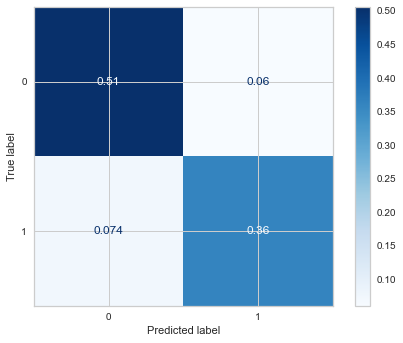

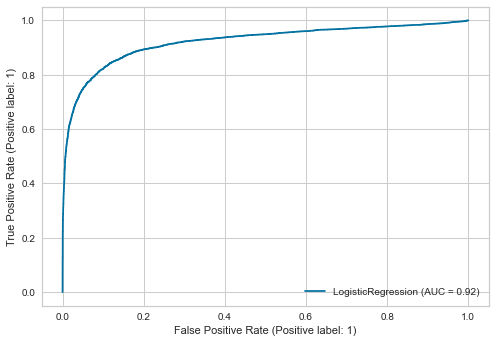

In [171]:
# Execute the run_model function to execute Logistic Regression
params_LR = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

logreg = LogisticRegression(**params_LR, random_state=0)

model_LR, train_accuracy_LR, test_accuracy_LR, roc_auc_LR, time_LR = run_model(logreg, X_train_final, y_train, X_test_final, y_test)

Train Accuracy = 0.86
Test Accuracy = 0.86
Area under ROCurve = 0.93
Time taken = 0.3029170036315918
Classification Report:
              precision    recall  f1-score   support

           0    0.87303   0.88863   0.88076      9401
           1    0.85162   0.83181   0.84160      7224

    accuracy                        0.86394     16625
   macro avg    0.86232   0.86022   0.86118     16625
weighted avg    0.86372   0.86394   0.86374     16625



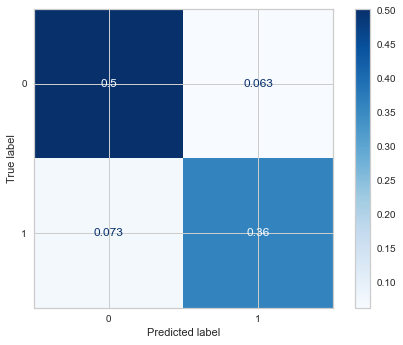

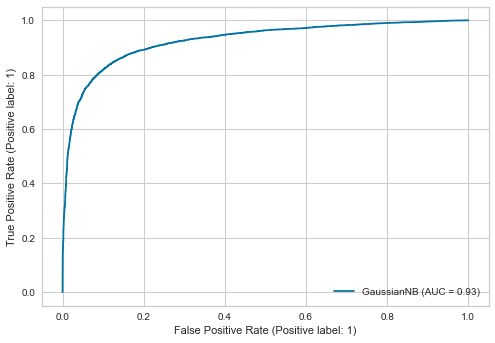

In [172]:
# Execute the run_model function to execute Gaussian Naive Bayes

naive = GaussianNB()

model_NB, train_accuracy_NB, test_accuracy_NB, roc_auc_NB, time_NB = run_model(naive, X_train_final, y_train, X_test_final, y_test)

Train Accuracy = 0.95
Test Accuracy = 0.93
Area under ROCurve = 0.97
Time taken = 17.86205244064331
Classification Report:
              precision    recall  f1-score   support

           0    0.93136   0.95256   0.94184      9401
           1    0.93638   0.90864   0.92230      7224

    accuracy                        0.93347     16625
   macro avg    0.93387   0.93060   0.93207     16625
weighted avg    0.93354   0.93347   0.93335     16625



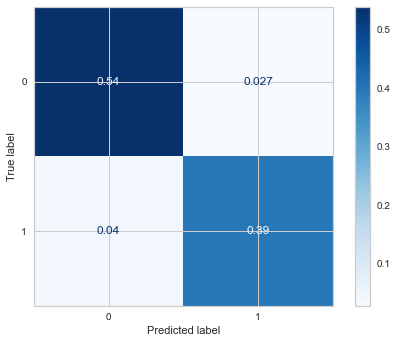

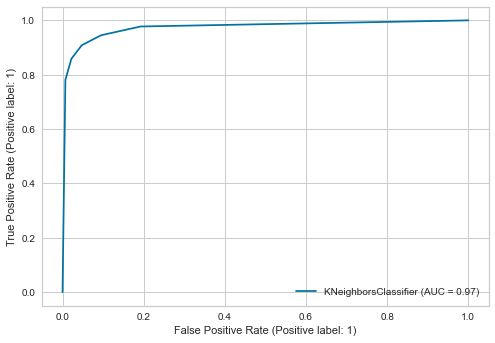

In [173]:
# Execute the run_model function to execute KNN algorithm
knn = KNeighborsClassifier()

model_KNN, train_accuracy_KNN, test_accuracy_KNN, roc_auc_KNN, time_KNN = run_model(knn, X_train_final, y_train, X_test_final, y_test)

Train Accuracy = 1.0
Test Accuracy = 0.93
Area under ROCurve = 0.93
Time taken = 0.39311766624450684
Classification Report:
              precision    recall  f1-score   support

           0    0.94001   0.93511   0.93756      9401
           1    0.91613   0.92234   0.91922      7224

    accuracy                        0.92956     16625
   macro avg    0.92807   0.92873   0.92839     16625
weighted avg    0.92963   0.92956   0.92959     16625



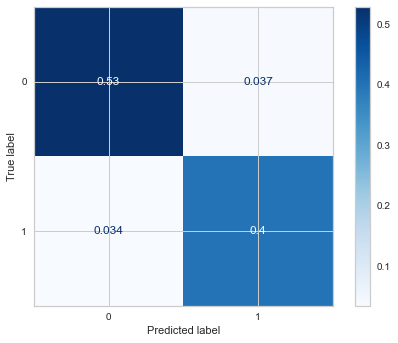

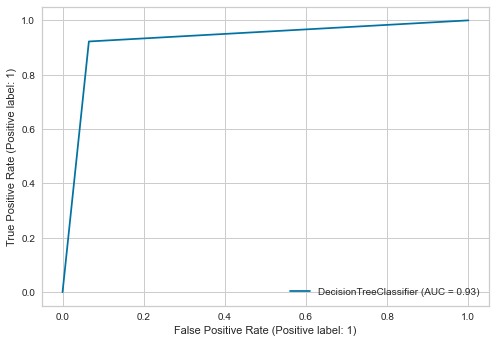

In [174]:
# Execute the run_model function to execute Decision Tree algorithm

dtc = DecisionTreeClassifier(random_state = 42, class_weight='balanced')

model_DT, train_accuracy_DT, test_accuracy_DT, roc_auc_DT, time_DT = run_model(dtc, X_train_final, y_train, X_test_final, y_test)

Train Accuracy = 1.0
Test Accuracy = 0.95
Area under ROCurve = 0.99
Time taken = 12.202390909194946
Classification Report:
              precision    recall  f1-score   support

           0    0.94726   0.96479   0.95594      9401
           1    0.95305   0.93009   0.94143      7224

    accuracy                        0.94971     16625
   macro avg    0.95015   0.94744   0.94869     16625
weighted avg    0.94977   0.94971   0.94964     16625



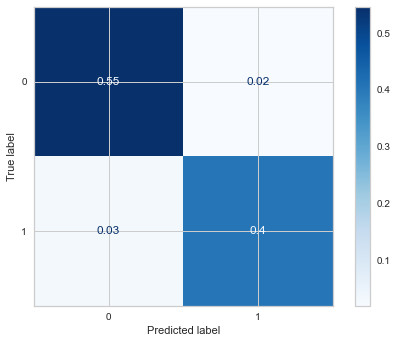

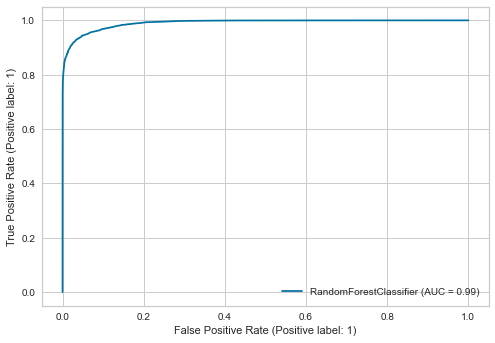

In [175]:
# Execute the run_model function to execute Random Forest algorithm

rfc = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)

model_RF, train_accuracy_RF, test_accuracy_RF, roc_auc_RF, time_RF = run_model(rfc, X_train_final, y_train, X_test_final, y_test)

Train Accuracy = 1.0
Test Accuracy = 0.94
Area under ROCurve = 0.99
Time taken = 122.08168530464172
Classification Report:
              precision    recall  f1-score   support

           0    0.94490   0.95394   0.94940      9401
           1    0.93930   0.92760   0.93342      7224

    accuracy                        0.94250     16625
   macro avg    0.94210   0.94077   0.94141     16625
weighted avg    0.94247   0.94250   0.94245     16625



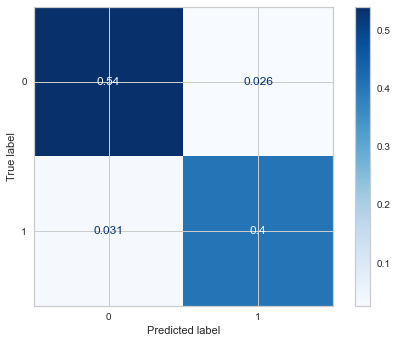

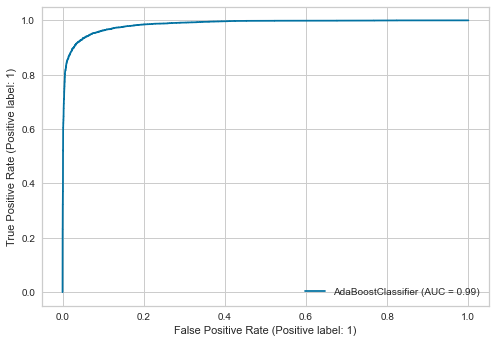

In [176]:
# Execute the run_model function to execute Ada Boost Classifier

ada = AdaBoostClassifier(base_estimator= (DecisionTreeClassifier(random_state = 42, class_weight='balanced')), n_estimators=500, random_state=42)

model_Ada, train_accuracy_Ada, test_accuracy_Ada, roc_auc_Ada, time_Ada = run_model(ada, X_train_final, y_train, X_test_final, y_test)

In [177]:
# Create a dataframe to compare the scores of various models
clf_names = train_scores = test_scores = auc_roc_scores = time_taken = []

clf_names = [model_LR, model_NB, model_KNN, model_DT, model_RF, model_Ada]
train_scores = [train_accuracy_LR, train_accuracy_NB, train_accuracy_KNN, train_accuracy_DT, train_accuracy_RF, train_accuracy_Ada]
test_scores = [test_accuracy_LR, test_accuracy_NB, test_accuracy_KNN, test_accuracy_DT, test_accuracy_RF, test_accuracy_Ada]
auc_roc_scores = [roc_auc_LR, roc_auc_NB, roc_auc_KNN, roc_auc_DT, roc_auc_RF, roc_auc_Ada]
time_taken = [time_LR, time_NB, time_KNN, time_DT, time_RF, time_Ada]

accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores, 'AUC score': auc_roc_scores, 'Time':time_taken}, index=clf_names)

display(accuracy_frame)

,Train Accuracy,Test Accuracy,AUC score,Time
LogisticRegression,0.86000,0.87000,0.92000,0.42114
GaussianNB,0.86000,0.86000,0.93000,0.30292
KNeighborsClassifier,0.95000,0.93000,0.97000,17.86205
DecisionTreeClassifier,1.00000,0.93000,0.93000,0.39312
RandomForestClassifier,1.00000,0.95000,0.99000,12.20239
AdaBoostClassifier,1.00000,0.94000,0.99000,122.08169


**Observation:**

- The highest **accuracy** achieved on the **test set** is **95%** which is given by **RandomForestClassifier** with ROC AUC score of **99% for class 'satisfaction.**

- The next best model in the line is **AdaBoostClassifier** which gave us an **accuracy** of **94%**.

- For both Random Forest and Adaboost the training accuracy is at 100%.

- I will go with go with Random Forest Classifier Since it gave us the best accuracy and reasonable execution time.


<a name = Section82></a>

## **8.2 Tuning the Model parameters**

- The **base-class** **Random Forest performed well** on our data.

- We will **tune** the model to find the **optimal parameters**.

In [178]:
param_grid_rfc = {'n_estimators': [100, 500],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [15,16,17,18,20],
                  'criterion' :['gini', 'entropy']}


random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                            param_distributions=param_grid_rfc, n_jobs = -1, cv= 5)
start_time = time.time()
random_search.fit(X_train_final, y_train)
evaluated_time = time.time()-start_time
print('Time taken for tuning RF is: ', np.round(evaluated_time, 2), 'sec')
print('----------------------------------------\n')
print("Best Parameter:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Time taken for tuning RF is:  343.14 sec
----------------------------------------

Best Parameter: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 18, 'criterion': 'gini'}
Best Score: 0.9489457944432477


- **No change in accuracy after RandomSearch, this shows that our baseline model was trained on the best set of hyperparamter by default.**

<a name = Section9></a>

---
# **9. Conclusion**
---

<a name = Section91></a>
### **9.1 Conclusion**
- 90% of the Personal travel customers are dissatisfied/neutral so Personal Travellers experience has to be improved.
- People travel either in Business class or Economy. Number of Eco plus customers are very less and nearly 80% of the total Eco plus class customers are dissatisfied/neutral. So we need to increase the number of travellers in Eco plus
- Maximum customers are in the age group 20-60 years. Facilities for senior citizens and young group has to be improved.
- Customers are neutral or dissatisfied for short distance travel. Facilities for short distance trvael must be improved.
- Most of the travellers are neutral or dissatisfied with 'Inflight Wifi service' and 'Ease of Online booking'
- Customers who are neutral or dissatisfied have poorly voted for the following services:
     - online boarding
     - Seat comfort
     - Inflight entertainment
     - Leg room service and
     - Cleanliness
        

<a name = Section92></a>
### **9.2 Actionable Insights**
- There should be few simple steps to book tickets Online with easy and secured payment option. 
- Mobile booking option should be available and discounts/miles can be provided who books online
- Airline could lower the cost to access Inflight wi-fi such that more Economy class customers can enjoy the service as well. They can develop better software to allow easier access and stable Inflight wi-fi.
- Seat comfort and Leg room space can be improvised in Economy plus to comfort the senior citizens and kids
- Inflight entertainment can have some movies for kids and senior citizens
- Passengers want to feel at ease when it comes to health and safety, especially with the ongoing risk of COVID-19. Airline should step up its cleaning checklist and take advantage of layovers as a time to make sure the aircraft is as healthy as possible. Extra face masks, disinfecting wipes and hand sanitizers can be stocked up on board. Air purification systems can be added to the aircraft. 

<a name = Section9></a>

---
# **10. Predicting the price for the future new data**
---

In [179]:
df_cust_test.shape

(20781, 25)

In [180]:
df_cust_test.sample(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_group,Total Delay
15654,114889,Male,Loyal Customer,41,Business travel,Business,1723,5,5,5,5,3,5,5,2,2,2,2,5,2,5,0,0.00000,30-45,0.00000
473,21057,Female,Loyal Customer,45,Business travel,Business,3340,5,5,5,5,4,2,3,4,4,4,4,1,4,5,0,0.00000,30-45,0.00000
677,2681,Female,Loyal Customer,26,Personal Travel,Eco,622,1,4,1,3,5,1,5,5,5,2,4,3,5,5,0,3.00000,15-30,3.00000
3431,121954,Male,Loyal Customer,46,Business travel,Business,3234,3,3,3,3,5,4,4,4,4,4,4,3,4,5,16,15.00000,45-60,31.00000
9064,59140,Male,Loyal Customer,26,Personal Travel,Eco,1744,2,4,2,2,2,2,2,2,4,5,3,5,5,2,2,0.00000,15-30,2.00000


In [181]:
#dropping the unwanted columns
test_data = df_cust_test.drop(['id','Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay', 'Gender','Age_group'], axis=1)
test_data.sample(5)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
13122,disloyal Customer,36,Business travel,Eco,926,3,3,1,3,1,1,1,5,3,2,3,1
17994,Loyal Customer,42,Business travel,Business,849,2,1,2,4,3,2,2,2,2,1,2,1
13179,Loyal Customer,45,Business travel,Business,3544,2,2,3,5,5,5,5,5,5,5,5,3
19538,Loyal Customer,36,Business travel,Eco,447,4,3,4,4,4,4,4,5,3,4,4,4
14937,Loyal Customer,61,Personal Travel,Eco,2165,5,5,3,5,4,3,4,5,3,5,5,3


In [182]:
#Encoding the categorical columns for the test data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)
test_data_encoded.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,41,303,5,3,5,5,5,5,4,3,3,5,5,5,0,0,1,0
1,18,391,1,5,1,1,1,1,4,3,3,1,4,1,0,0,0,0
2,13,569,2,2,1,2,1,1,5,4,4,5,5,1,0,1,0,1
3,23,109,1,1,3,1,1,3,2,5,5,3,1,3,1,0,1,0
4,23,83,4,0,5,0,5,5,3,5,4,3,5,5,0,1,0,0


In [183]:
#Selecting the features for the RF model
test_data_encoded = test_data_encoded[important_features_selected]
test_data_encoded.head()

,Online boarding,Inflight wifi service,Type of Travel_Personal Travel,Class_Eco,Inflight entertainment,Seat comfort,Flight Distance,Ease of Online booking,Leg room service,Customer Type_disloyal Customer,Age,On-board service
0,5,5,0,1,5,5,303,3,3,0,41,4
1,1,1,0,0,1,1,391,5,3,0,18,4
2,2,2,1,0,1,1,569,2,4,0,13,5
3,1,1,0,1,3,1,109,1,5,1,23,2
4,0,4,1,0,5,5,83,0,5,0,23,3


In [184]:
# Standardizing the test data with the scaler of Train DS

test_data_encoded = scaler.transform(test_data_encoded) 

In [185]:
# Predicting the target variable 'Satisfaction' for the testdata
y_predict_testdata = rfc.predict(test_data_encoded)

In [186]:
output_df = pd.DataFrame()
output_df = pd.DataFrame(y_predict_testdata, index=df_cust_test.id, columns= ['Satisfaction'])
output_df[:10]

,Satisfaction
id,
23509,1
31011,0
29345,0
50242,0
22244,0
111019,0
15315,0
118762,0
102047,0


In [187]:
output_df['Satisfaction'] = output_df['Satisfaction'].map({1:'satisfied', 0:'neutral or dissatisfied'})

In [188]:
output_df.to_csv('submission_flight_passenger_satisfaction.csv',header=False)